## Automaded Dialogue Games

### Authors: Stefan Sarkadi and Ionut Moraru
#### AAAI2020

Two agents, Deceiver (DEC), and an Interrogator (INT) take part in a dialogue game based on a World Graph (WG). Both agents have a knowledge base (KB) and a Theory of Mind of each other (ToM). The goal of DEC $G_{Dec}$ is to make INT infer the wrong color of the nodes that make up the WG.

The social parameters that influence the interaction between the two agents are the following:

1) Trust

2) Cognitive Load

3) Communicative skill (Cognitive resources)

4) Rewards for both agents + rewards calculated by the game

The actions that INT can perform are accept/reject argument provided by DEC, ask DEC about colour of a node.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

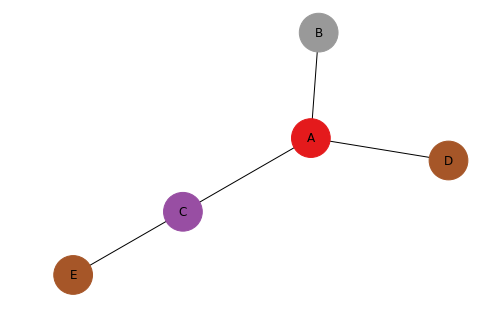

In [8]:
# Build a dataframe with your connections
df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']})
 
# And a data frame with characteristics for your nodes
carac = pd.DataFrame({ 'ID':['A', 'B', 'C','D','E'], 'myvalue':['group1','group4','group2','group3','group3'] })
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
# The order of the node for networkX is the following order:
G.nodes()
# Thus, we cannot give directly the 'myvalue' column to netowrkX, we need to arrange the order!
 
# Here is the tricky part: I need to reorder carac to assign the good color to each node
carac= carac.set_index('ID')
carac=carac.reindex(G.nodes())
 
# And I need to transform my categorical column in a numerical value: group1->1, group2->2...
carac['myvalue']=pd.Categorical(carac['myvalue'])
carac['myvalue'].cat.codes
 
# Custom the nodes:
nx.draw(G, with_labels=True, node_color=carac['myvalue'].cat.codes, cmap=plt.cm.Set1, node_size=1500)

In [24]:
G = nx.Graph()

In [29]:
G.add_nodes_from([2,3,4])

In [15]:
H = nx.path_graph(10)

In [16]:
G.add_nodes_from(H)

In [18]:
G.add_node(H)

In [27]:
G.add_edge(1,2)
e=(2,3)
G.add_edge(*e)

In [33]:
G.add_edges_from([(2,5),(2,4),(2,2)])

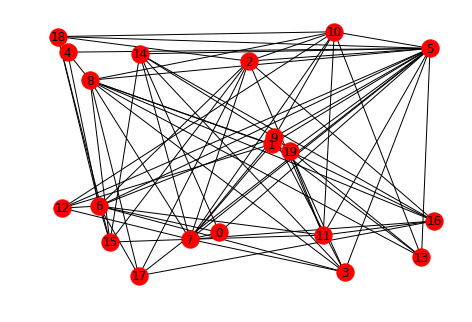

In [103]:
nx.draw_random(G, with_labels=True)

In [52]:
FG=nx.Graph()

In [53]:
FG.add_weighted_edges_from([(1,2,0.125),(1,3,0.75),(2,4,1.2),(3,4,0.375)])

In [55]:
for n,nbrs in FG.adjacency():
    for nbr, eattr in nbrs.items():
        data = eattr['weight']
        if data < 0.5: print('(%d, %d, %.3f)' % (n,nbr,data))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [83]:
G.clear()
G=nx.barabasi_albert_graph(20,5)

In [97]:
print(nx.adjacency_matrix(G))

  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 14)	1
  (1, 5)	1
  (1, 7)	1
  (1, 8)	1
  (1, 9)	1
  (1, 12)	1
  (1, 13)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 10)	1
  (2, 11)	1
  (2, 15)	1
  (2, 16)	1
  (2, 17)	1
  (2, 18)	1
  (3, 5)	1
  (3, 6)	1
  (3, 7)	1
  (3, 8)	1
  (3, 9)	1
  (3, 14)	1
  :	:
  (15, 8)	1
  (15, 14)	1
  (15, 18)	1
  (16, 2)	1
  (16, 7)	1
  (16, 8)	1
  (16, 11)	1
  (16, 14)	1
  (16, 17)	1
  (16, 19)	1
  (17, 2)	1
  (17, 5)	1
  (17, 6)	1
  (17, 8)	1
  (17, 16)	1
  (18, 2)	1
  (18, 5)	1
  (18, 6)	1
  (18, 10)	1
  (18, 15)	1
  (19, 3)	1
  (19, 5)	1
  (19, 8)	1
  (19, 11)	1
  (19, 16)	1


In [94]:
for n in nx.nodes(G):
    print(n.ge)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [ ]:
class Deceiver(object):
    KB = nx.Graph()
    ToM = nx.Graph()
    Goal = {}
    CogRes = 0
    Reward = 0
    Win = False
    
#   Initializer for the Deceiver class
    def __init__(self, KB, ToM, Goal, CogRes, Reward):
        self.KB = KB
        self.ToM = ToM
        self.Goal = Goal
        self.CogRes = CogRes
        self.Reward = Reward
        self.Win = False
        
#   In this method, the Deceiver will respond to the querry about a node by returning the dict with a color attribute
    def respondToINT(node):
        color = ''
        
        actualColor = KB[node]['color']
        
        # TODO:Calculate if we should respond truthfuly or not in this case.
        
        
        response = {'color': color}
        return response
    
    def receiveAcceptance(accept):
        # Proces and update all the values depending on the truth value of the Acceptance. 
        # Ask stefan what needs to be updated when
        if accept:
            # ToM update
        else:
            # ToM update
            
        checkGoal()
            
    def checkGoal():
        # check if Goal condition is satisfied with the current ToM.
        
        
            
        
        
        